## **Loading Libraries**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import time
import re
import random
import os
from os import path
import io
from collections import Counter
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.stem.porter import *
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import RegexpTagger
from nltk import AffixTagger
from nltk import NgramTagger
from nltk import UnigramTagger
from nltk.corpus import brown
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from nltk.corpus import brown
nltk.download('brown', quiet=True)
nltk.download('universal_tagset', quiet=True)
from PIL import Image

## **Loading Data**

In [164]:
df1 = pd.read_csv("2.NLP MENTIONS - staysafe domesticviolence DomesticAbuse DomesticViolence.csv")

In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               50000 non-null  int64  
 1   Source           50000 non-null  object 
 2   Host             50000 non-null  object 
 3   Link             50000 non-null  object 
 4   Date(ET)         50000 non-null  object 
 5   Time(ET)         50000 non-null  object 
 6   LocalTime        50000 non-null  object 
 7   Category         0 non-null      float64
 8   Author ID        50000 non-null  object 
 9   Author Name      50000 non-null  object 
 10  Author URL       50000 non-null  object 
 11  Authority        50000 non-null  int64  
 12  Followers        50000 non-null  int64  
 13  Following        50000 non-null  int64  
 14  Age              0 non-null      float64
 15  Gender           30266 non-null  object 
 16  Language         50000 non-null  object 
 17  Country     

In [166]:
df2 = pd.read_csv("5.NLP - Twitter Mentions- HeForSheAtHome.csv")

In [167]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               50000 non-null  int64  
 1   Source           50000 non-null  object 
 2   Host             50000 non-null  object 
 3   Link             50000 non-null  object 
 4   Date(ET)         50000 non-null  object 
 5   Time(ET)         50000 non-null  object 
 6   LocalTime        50000 non-null  object 
 7   Category         0 non-null      float64
 8   Author ID        50000 non-null  object 
 9   Author Name      49999 non-null  object 
 10  Author URL       50000 non-null  object 
 11  Authority        50000 non-null  int64  
 12  Followers        50000 non-null  int64  
 13  Following        50000 non-null  int64  
 14  Age              0 non-null      float64
 15  Gender           26103 non-null  object 
 16  Language         50000 non-null  object 
 17  Country     

In [168]:
df3 = pd.read_csv("5.NLP-TWITTER-#METOO.csv")

In [169]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               3000 non-null   int64  
 1   Source           3000 non-null   object 
 2   Host             3000 non-null   object 
 3   Link             3000 non-null   object 
 4   Date(ET)         3000 non-null   object 
 5   Time(ET)         3000 non-null   object 
 6   LocalTime        3000 non-null   object 
 7   Category         0 non-null      float64
 8   Author ID        3000 non-null   object 
 9   Author Name      3000 non-null   object 
 10  Author URL       3000 non-null   object 
 11  Authority        3000 non-null   int64  
 12  Followers        3000 non-null   int64  
 13  Following        3000 non-null   int64  
 14  Age              0 non-null      float64
 15  Gender           1958 non-null   object 
 16  Language         3000 non-null   object 
 17  Country       

In [170]:
df4 = pd.read_csv("5.NLP-TWITTER-#WHYISTAYED_#WHYILEFT.csv")

In [171]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               2581 non-null   int64  
 1   Source           2581 non-null   object 
 2   Host             2581 non-null   object 
 3   Link             2581 non-null   object 
 4   Date(ET)         2581 non-null   object 
 5   Time(ET)         2581 non-null   object 
 6   LocalTime        2581 non-null   object 
 7   Category         0 non-null      float64
 8   Author ID        2581 non-null   object 
 9   Author Name      2581 non-null   object 
 10  Author URL       2581 non-null   object 
 11  Authority        2581 non-null   int64  
 12  Followers        2581 non-null   int64  
 13  Following        2581 non-null   int64  
 14  Age              0 non-null      float64
 15  Gender           1855 non-null   object 
 16  Language         2581 non-null   object 
 17  Country       

In [173]:
df = pd.concat([df1, df2,df3,df4], axis=0,ignore_index=True)


# TOPIC MODELING

In [181]:
# Remove Contractions 
def decontracted(phrase):
    """
    Function uses regular expression to substitute common constructs used in text which 
    involve contractions.
    A contraction is a shortened form of one or two words (one of which is usually a verb).
    e.g. 'won't' will be replaced with 'will not'

    parameters:
    text (str): the text to use
    """ 
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"he\ ’ s", "he is", phrase)
    phrase = re.sub(r"i\ ’ m", "he is", phrase)
   
   

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'didnt", " did not", phrase)
    return phrase

In [182]:
# Reduce words length to avoid misspelling like "happpppy" will be "happy"

def reduce_lengthening(text):
    """
    Function uses regular expression to correct spelling errors from the text which involve incorrect repeated letters

    parameters:
    text (str): the text to use
    """  
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)
# Apply the above pre-proessing functions to the Comment column

df['Contents']=df['Contents'].apply(reduce_lengthening, 0) 
df['Contents']=df['Contents'].apply(decontracted, 0)

In [183]:
#Setting Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
stw = sw + ['https','lot','httpstcoxn_tumhy', 'httpstcocgpu_hxya', 're', 'edu', 'use','good','really','quite','nice','well','little','need','keep','make','important','take','get','very','course','instructor','example']
ps = PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/begosfriiive/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [184]:
def nlpFunction(df):
    """
    Function to carry out NLP type functions on the Comment text.
    
    the text is split into tokens 
    stopwords are removed
    lemmatization is carried out
      e.g.  am, are,is  => be
            car, cars, car's, cars = > car
    the <space> separated words are then added to a new column that will be used for sentiment analysis

    parameters:
    df (dataframe): the dataframe to use, the 'Comment' column is used 
    """ 
    df['com_token'] = df['Contents'].str.lower().str.split()
    df['com_remv'] = df['com_token'].apply(lambda x: [y for y in x if y not in stw]) #tokenization
    df["com_lemma"] = df['com_remv'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) # lemmatization
    df["com_tok_str"] = df["com_lemma"].apply(', '.join)
    df["com_full"] = df["com_lemma"].apply(' '.join)
    return df

In [185]:
nltk.download('wordnet')
df = nlpFunction(df)
df["Orig_comment"] = df["Contents"]
df["Comment"] = df["com_full"]
df[['Orig_comment','Comment']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/begosfriiive/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Orig_comment,Comment
0,RT @RefugeCharity: Does your partner constantl...,rt @refugecharity: partner constantly undermin...
1,RT @SaheliEnfield: BBC News: UK lockdown: Call...,rt @sahelienfield: bbc news: uk lockdown: call...
2,RT @sallycroachy: @the_police_fdn @CommonsHome...,rt @sallycroachy: @the_police_fdn @commonshome...
3,RT @deAdder: cartoon for @TorontoStar #coronav...,rt @deadder: cartoon @torontostar #coronavirus...
4,RT @WALLAction: Men who kill their partners fo...,"rt @wallaction: men kill partner follow ""homic..."


In [186]:
df[['Orig_comment','Comment']].head()

,Orig_comment,Comment
0,RT @RefugeCharity: Does your partner constantl...,rt @refugecharity: partner constantly undermin...
1,RT @SaheliEnfield: BBC News: UK lockdown: Call...,rt @sahelienfield: bbc news: uk lockdown: call...
2,RT @sallycroachy: @the_police_fdn @CommonsHome...,rt @sallycroachy: @the_police_fdn @commonshome...
3,RT @deAdder: cartoon for @TorontoStar #coronav...,rt @deadder: cartoon @torontostar #coronavirus...
4,RT @WALLAction: Men who kill their partners fo...,"rt @wallaction: men kill partner follow ""homic..."


In [187]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="?disaster"
print(remove_punct(example))

disaster


In [188]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df['Comment']=df['Comment'].apply(lambda x : remove_URL(x))

In [189]:
df['Comment']=df['Comment'].apply(lambda x : remove_punct(x))

In [190]:
df['Comment'][16]

'rt ckneer ever reminding child victim witness domesticabuse moving input mark fletcher mp brings home powerfully dabill'

# TOPIC MODELING

In [191]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [192]:
try:
    import re2 as re
except ImportError:
    import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [194]:
# Convert to list
data = df['Comment'].values.tolist()
pprint(data[:20])

['rt refugecharity partner constantly undermine you control see spend money '
 'domesticabuse physical team want talk confidence  ',
 'rt sahelienfield bbc news uk lockdown call domestic abuse helpline jump '
 'half  home always safe place everyone pls ☎️07483166493 help always you '
 'domesticabuse mentalhealthduringcovid19 krishnajis',
 'rt sallycroachy thepolicefdn commonshomeaffs encouraged language identifies '
 'child experiencing domesticabuse rather simply witnessing real risk lie '
 'moment time',
 'rt deadder cartoon torontostar coronavirus covid19 domesticabuse ',
 'rt wallaction men kill partner follow homicide timeline could tracked police '
 'help prevent deaths criminology expert dr jane monckton smith found 8stage '
 'pattern 372 killing uk domesticviolence domesticabuse womensaid ',
 'qt livefearfree rt swpolice concerned domesticabuse victim may increased '
 'risk harm mum dad child partner 👀 👂 friend neighbo…  think someone victim '
 'domestic abuse give advice need 

In [195]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:2])

[['rt', 'refugecharity', 'partner', 'constantly', 'undermine', 'you', 'control', 'see', 'spend', 'money', 'domesticabuse', 'physical', 'team', 'want', 'talk', 'confidence'], ['rt', 'sahelienfield', 'bbc', 'news', 'uk', 'lockdown', 'call', 'domestic', 'abuse', 'helpline', 'jump', 'half', 'home', 'always', 'safe', 'place', 'everyone', 'pls', 'help', 'always', 'you', 'domesticabuse', 'krishnajis']]


In [196]:

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=3)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[10]]])

['rt', 'lisacybaniak', 'ignore', 'more', 'thank', 'mike', 'cameron', 'men', 'willing', 'stand', 'change', 'leading_example', 'nomore', 'standup', 'domesticabuse']


In [197]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stw] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [198]:
#Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:20])

[['control', 'domesticabuse', 'team', 'talk_confidence'], ['call', 'domestic_abuse', 'half', 'safe_place'], ['commonshomeaff', 'language', 'child', 'domesticabuse', 'risk', 'lie', 'moment', 'time'], ['domesticabuse'], ['help'], ['livefearfree', 'domesticabuse', 'victim', 'child', 'partner', 'victim', 'domestic_abuse', 'advice'], ['information', 'man', 'woman', 'around_world', 'offer_counseling', 'shelter', 'stay_safe'], ['violence', 'covid_pandemic', 'stress', 'isolation', 'control', 'lead', 'abuse', 'household'], ['violence', 'covid_pandemic', 'stress', 'isolation', 'control', 'lead', 'abuse', 'household'], ['fundraiser', 'violence', 'victim'], ['man', 'change'], ['contact', 'victim', 'domesticabuse', 'victim', 'advice_apply', 'police_response', 'support_service'], [], ['partner', 'blame', 'abuse', 'argument', 'abuse', 'thing'], ['collection', 'years_chapter', 'sustainable_development'], [], ['domesticabuse'], ['domesticabuse', 'victim', 'domesticabuse'], ['today'], ['technology', 'he

In [199]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
#print('Number of unique words in initital documents:', len(dictionary))

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1)], [(1, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(1, 1)], [(15, 1)], [(1, 1), (5, 1), (8, 1), (16, 1), (17, 1), (18, 1), (19, 2)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(0, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(0, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(19, 1), (33, 1), (34, 1)]]


In [200]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

[[('control', 1), ('domesticabuse', 1), ('talk_confidence', 1), ('team', 1)],
 [('call', 1), ('domestic_abuse', 1), ('half', 1), ('safe_place', 1)],
 [('domesticabuse', 1),
  ('child', 1),
  ('commonshomeaff', 1),
  ('language', 1),
  ('lie', 1),
  ('moment', 1),
  ('risk', 1),
  ('time', 1)],
 [('domesticabuse', 1)],
 [('help', 1)],
 [('domesticabuse', 1),
  ('domestic_abuse', 1),
  ('child', 1),
  ('advice', 1),
  ('livefearfree', 1),
  ('partner', 1),
  ('victim', 2)],
 [('around_world', 1),
  ('information', 1),
  ('man', 1),
  ('offer_counseling', 1),
  ('shelter', 1),
  ('stay_safe', 1),
  ('woman', 1)],
 [('control', 1),
  ('abuse', 1),
  ('covid_pandemic', 1),
  ('household', 1),
  ('isolation', 1),
  ('lead', 1),
  ('stress', 1),
  ('violence', 1)],
 [('control', 1),
  ('abuse', 1),
  ('covid_pandemic', 1),
  ('household', 1),
  ('isolation', 1),
  ('lead', 1),
  ('stress', 1),
  ('violence', 1)],
 [('victim', 1), ('violence', 1), ('fundraiser', 1)]]

In [203]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [204]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.080*"time" + 0.042*"thing" + 0.035*"work" + 0.020*"relationship" + '
  '0.020*"gender" + 0.019*"allegation" + 0.018*"partner" + '
  '0.017*"metoo_movement" + 0.016*"person" + 0.015*"part"'),
 (1,
  '0.093*"metoo" + 0.055*"victim" + 0.052*"girl" + 0.040*"support" + '
  '0.039*"survivor" + 0.034*"today" + 0.028*"world" + 0.020*"movement" + '
  '0.017*"way" + 0.015*"whyileft"'),
 (2,
  '0.218*"woman" + 0.064*"whyileft" + 0.054*"man" + '
  '0.053*"relationship_saftey" + 0.038*"abuse" + 0.031*"people" + '
  '0.024*"smday" + 0.015*"day" + 0.012*"life" + 0.011*"child"'),
 (3,
  '0.082*"help" + 0.058*"shame" + 0.045*"fully_admit" + 0.039*"action" + '
  '0.038*"family" + 0.027*"sex" + 0.024*"number" + 0.024*"money" + '
  '0.019*"education" + 0.017*"book"'),
 (4,
  '0.163*"whyileft" + 0.157*"relationship_saftey" + 0.133*"justice" + '
  '0.044*"violence" + 0.027*"country" + 0.020*"ipuparliament" + 0.016*"case" + '
  '0.011*"equality" + 0.011*"share" + 0.011*"love"'),
 (5,
  '0.104*"stor

In [205]:
ldatopics = lda_model.show_topics(formatted=False)

In [209]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.053384517307933

Coherence Score:  0.4647001573752784


# # Interpretation of the 6 topics:

Through all the tweets the main conversation is from organizations and movements to invite people to join the movements through hashtags and facts, we can also perceive not only organizations but sponsors.  

The most relevant movements revolve around different topics:

1. #WHYILEFT, #METOO, #WITHHER: This movements revolve around raising awareness and take action with the organization - ipu parliament (global organization of national parliaments to promote peace, democracy and sustainability), also the sponsorship of women in sport.
2. #METOO, #believewoman: Victims sharing their stories and support of one another and sharing their survivor stories, organization - ipu parliament (global organization of national parliaments to promote peace, democracy and sustainability), also the sponsorship of women in sport.
 3. #genderequality: Feminism and equality - Backed by the organization "everyday equality" to drive equal social opportunities in UK.
4.#timesup: Campaign to report and end violence thus creating an equal future, promoting also job quality and activism.
5.Abuse regarding rape in family and work: organization - Orange the World: Generation Equality Stands against Rape
6. Promotes discussion of psychological abuse, harassment and solution making.



Main Insights:

On Twitter is about joining the conversation and promoting the initiatives and campaigns, identified movements:

whyistayed,metoo,timesup,heforshe,iwillgoout,yesallwomen,orangetheworld,niunamenos ,everydaysexism,womenshould 

Organizations: UN Women, womeninsport (company), ipu parliament, globalspotlight (A global, multi-year partnership between the #EU and the 
@UN
 to eliminate all forms of violence against women and girls)


An improvement that can be done in twitter is not only promote de initiatives and join the conversation but invite victims to share their story via Reddit, because there is no character limit, thus increasing Reddit´s testimonies and having more information regarding this subject.



In [208]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.224390 -0.049697       1        1  28.387365
1     -0.031869  0.121014       2        1  19.660034
4     -0.253943 -0.095192       3        1  18.146862
0      0.106253  0.224425       4        1  14.098871
5      0.160808  0.079582       5        1  11.346087
3      0.243142 -0.280131       6        1   8.360780, topic_info=                      Term          Freq         Total Category  logprob  \
26                   woman  24655.000000  24655.000000  Default  30.0000   
62                 justice   9600.000000   9600.000000  Default  29.0000   
17085  relationship_saftey  18583.000000  18583.000000  Default  28.0000   
17086             whyileft  20770.000000  20770.000000  Default  27.0000   
714                  metoo   7334.000000   7334.000000  Default  26.0000   
...                    ...           ...           ...      ...      ...   
5696        child_marriage    156.555984    157.593414   Topic6  -5.3618   
3971                return    164.862244    165.954773   Topic6  -5.3101   
15542          fully_admit   1503.485596   1585.028687   Topic6  -3.0996   
16842    punished_innocent    271.310608    295.983307   Topic6  -4.8119   
371    psychological_abuse    366.454681    546.996704   Topic6  -4.5113   

       loglift  
26     30.0000  
62     29.0000  
17085  28.0000  
17086  27.0000  
714    26.0000  
...        ...  
5696    2.4750  
3971    2.4750  
15542   2.4288  
16842   2.3946  
371     2.0811  

[252 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
27        1  0.999648      abuse
311       1  0.014671     abuser
311       2  0.951508     abuser
311       3  0.018862     abuser
311       4  0.002096     abuser
...     ...       ...        ...
731       5  0.995878     worker
212       2  0.999318      world
426       5  0.999267       year
389       5  0.995647  yesterday
1697      3  0.998001      youth

[348 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 6, 4])

In [210]:
pyLDAvis.save_html(vis, 'Twitter_All.html')

# UK TOPIC CONVERSATION


In [94]:
UK=Country[Country.Country == 'UK']
UK

,Country,Contents
1,UK,RT @SaheliEnfield: BBC News: UK lockdown: Call...
16,UK,RT @C_Kneer: If ever we need reminding that ch...
17,UK,RT @Sammieb1980: Hi @HarrietHarman can we use ...
18,UK,RT @MissTracyGraham: So honoured to be mention...
23,UK,RT @EmilyDeekerSky: When home is not a safe pl...
...,...,...
105416,UK,"""Well directed and acted funny yet provocative..."
105438,UK,"""A very entertaining evening with brilliant wr..."
105442,UK,"""A great way to provoke serious reflection, gr..."
105443,UK,"""A great way to provoke serious reflection, gr..."


## Pre- Processing Data

In [95]:
# Remove Contractions 
def decontracted(phrase):
    """
    Function uses regular expression to substitute common constructs used in text which 
    involve contractions.
    A contraction is a shortened form of one or two words (one of which is usually a verb).
    e.g. 'won't' will be replaced with 'will not'

    parameters:
    text (str): the text to use
    """ 
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"he\ ’ s", "he is", phrase)
    phrase = re.sub(r"i\ ’ m", "he is", phrase)
   
   

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'didnt", " did not", phrase)
    return phrase

In [96]:
# Reduce words length to avoid misspelling like "happpppy" will be "happy"

def reduce_lengthening(text):
    """
    Function uses regular expression to correct spelling errors from the text which involve incorrect repeated letters

    parameters:
    text (str): the text to use
    """  
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)
# Apply the above pre-proessing functions to the Comment column

UK['Contents']=UK['Contents'].apply(reduce_lengthening, 0) 
UK['Contents']=UK['Contents'].apply(decontracted, 0)

In [108]:
#Setting Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
stw = sw + ['https','lot','httpstcoxn_tumhy', 'httpstcocgpu_hxya', 're', 'edu', 'use','good','really','quite','nice','well','little','need','keep','make','important','take','get','very','course','instructor','example']
ps = PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [109]:
def nlpFunction(df):
    """
    Function to carry out NLP type functions on the Comment text.
    
    the text is split into tokens 
    stopwords are removed
    lemmatization is carried out
      e.g.  am, are,is  => be
            car, cars, car's, cars = > car
    the <space> separated words are then added to a new column that will be used for sentiment analysis

    parameters:
    df (dataframe): the dataframe to use, the 'Comment' column is used 
    """ 
    UK['com_token'] = UK['Contents'].str.lower().str.split()
    UK['com_remv'] = UK['com_token'].apply(lambda x: [y for y in x if y not in stw]) #tokenization
    UK["com_lemma"] = UK['com_remv'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) # lemmatization
    UK["com_tok_str"] = UK["com_lemma"].apply(', '.join)
    UK["com_full"] = UK["com_lemma"].apply(' '.join)
    return df

In [110]:
nltk.download('wordnet')
UK = nlpFunction(UK)
UK["Orig_comment"] = UK["Contents"]
UK["Comment"] = UK["com_full"]
UK[['Orig_comment','Comment']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/begosfriiive/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
UK[['Orig_comment','Comment']].head()

,Orig_comment,Comment
1,RT @SaheliEnfield: BBC News: UK lockdown: Call...,rt @sahelienfield: bbc news: uk lockdown: call...
16,RT @C_Kneer: If ever we need reminding that ch...,rt @c_kneer: ever reminding child victim witne...
17,RT @Sammieb1980: Hi @HarrietHarman can we use ...,rt @sammieb1980: hi @harrietharman term #domes...
18,RT @MissTracyGraham: So honoured to be mention...,rt @misstracygraham: honoured mentioned house ...
23,RT @EmilyDeekerSky: When home is not a safe pl...,rt @emilydeekersky: home safe place be. tune @...


In [112]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="?disaster"
print(remove_punct(example))

disaster


In [113]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
UK['Comment']=UK['Comment'].apply(lambda x : remove_URL(x))

In [114]:
UK['Comment']=UK['Comment'].apply(lambda x : remove_punct(x))

In [115]:
UK['Comment'][16]

'rt ckneer ever reminding child victim witness domesticabuse moving input mark fletcher mp brings home powerfully dabill'

In [116]:
example="httpstcoxn_tumhy"
print(remove_URL(example))

httpstcoxn_tumhy


# Topic Modeling-UK

In [117]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [118]:
try:
    import re2 as re
except ImportError:
    import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [119]:
# Convert to list
data_UK = UK['Comment'].values.tolist()
pprint(data_UK[:20])

['rt sahelienfield bbc news uk lockdown call domestic abuse helpline jump '
 'half  home always safe place everyone pls ☎️07483166493 help always you '
 'domesticabuse mentalhealthduringcovid19 krishnajis',
 'rt ckneer ever reminding child victim witness domesticabuse moving input '
 'mark fletcher mp brings home powerfully dabill',
 'rt sammieb1980 hi harrietharman term domesticabuse please say domestic '
 'violence people coercively controlled psychologically sexually financially '
 'abused physically hurt know victim domesticabuse domesticabusebill',
 'rt misstracygraham honoured mentioned house common today robertbuckland '
 'thank you domesticabusebill domesticviolence youarenotalone ',
 'rt emilydeekersky home safe place be tune skynews 735pm hear one brave young '
 'woman chose speak out working hard help domesticabuse covid19safe swindonwa '
 'carolineblack22 wiltshirewoman jasonfarrellsky robertbuckland ',
 'rt stagainstdv great mopacldn london vawg coordinators call morning s

In [120]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words_UK = list(sent_to_words(data_UK))

print(data_words_UK[:2])

[['rt', 'sahelienfield', 'bbc', 'news', 'uk', 'lockdown', 'call', 'domestic', 'abuse', 'helpline', 'jump', 'half', 'home', 'always', 'safe', 'place', 'everyone', 'pls', 'help', 'always', 'you', 'domesticabuse', 'krishnajis'], ['rt', 'ckneer', 'ever', 'reminding', 'child', 'victim', 'witness', 'domesticabuse', 'moving', 'input', 'mark', 'fletcher', 'mp', 'brings', 'home', 'powerfully', 'dabill']]


In [121]:

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words_UK, min_count=2, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words_UK], threshold=3)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words_UK[10]]])

['rt', 'gazettenewsdesk', 'victim', 'abuse', 'received', 'help', 'police', 'campaign', 'lockdown']


In [122]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stw] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [123]:
#Remove Stop Words
data_words_nostops = remove_stopwords(data_words_UK)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:2])

[['call', 'half', 'home'], ['domesticabuse']]


In [124]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
#print('Number of unique words in initital documents:', len(dictionary))

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1)], [(3, 1)], [(3, 2), (4, 1), (5, 1)], [(6, 1)], [], [(3, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(10, 1)], [(12, 1)], [(3, 2), (4, 1), (5, 1)], [(3, 1), (13, 1), (14, 1), (15, 1)]]


In [125]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

[[('call', 1), ('half', 1), ('home', 1)],
 [('domesticabuse', 1)],
 [('domesticabuse', 2), ('term', 1), ('victim', 1)],
 [('today', 1)],
 [],
 [('domesticabuse', 1),
  ('cjs', 1),
  ('coordinator', 1),
  ('morning', 1),
  ('perpetrator', 1),
  ('thank', 1)],
 [('perpetrator', 1)],
 [('help', 1)],
 [('domesticabuse', 2), ('term', 1), ('victim', 1)],
 [('domesticabuse', 1), ('funding', 1), ('survivor', 1), ('vawg_service', 1)]]

In [126]:
lda_model_UK = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [127]:
pprint(lda_model_UK.print_topics())
doc_lda = lda_model_UK[corpus]

[(0,
  '0.070*"job" + 0.068*"service" + 0.061*"danger" + 0.027*"sector" + '
  '0.027*"reflection" + 0.025*"friend" + 0.024*"apply_police" + 0.023*"chance" '
  '+ 0.022*"find_support" + 0.021*"mind"'),
 (1,
  '0.298*"woman" + 0.056*"man" + 0.025*"year" + 0.025*"response" + '
  '0.017*"share" + 0.017*"call" + 0.017*"story" + 0.012*"iwd" + '
  '0.011*"withher" + 0.011*"thank"'),
 (2,
  '0.070*"unwoman" + 0.066*"home" + 0.065*"girl" + 0.052*"people" + '
  '0.043*"way" + 0.038*"world" + 0.023*"child" + 0.020*"change" + '
  '0.018*"family" + 0.018*"love"'),
 (3,
  '0.196*"support" + 0.081*"domestic_abuse" + 0.060*"call_immediate" + '
  '0.051*"response_support" + 0.031*"lockdown" + 0.020*"covid_pandemic" + '
  '0.018*"crisis" + 0.017*"inequality" + 0.017*"life" + 0.015*"smday"'),
 (4,
  '0.051*"justice" + 0.050*"equality" + 0.047*"find" + 0.045*"country" + '
  '0.043*"survivor" + 0.038*"level_power" + 0.038*"especially_top" + '
  '0.038*"still_across" + 0.034*"action" + 0.022*"issue"'),
 (5,

In [128]:
ldatopics = lda_model_UK.show_topics(formatted=False)

In [129]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_UK.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_UK = CoherenceModel(model=lda_model_UK, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda_UK.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.497766703319882

Coherence Score:  0.4842116318419627


# Interpretation of the 8 topics:

UK topic are not only about organizations, but the topics revolve around mainly domestic abuse, trying to aid women, in the second topic inviting women to call immediately during COVID. 

There movements present are: gender_equality,genderbased_violence and metoo,womencount we also identify organizations: UN Women, Women in sport and globalspotlight_scaling.

1:#gender_equality: sponsored by women in sport, inviting to stop violence and abuse . 
2. Covid help: Aiding women to call during the actual crisis and trying to aid women. 
3. International Women Day and with her movement. 
4. All about organization´s hashtags: prevention centers, facts and promoting prevention and aid: Organizations: Unwoman and globalspotlight.
5, 6, and 8. Aid during COVID promoting a helpline and communicating that support service remains availiable. 
7. RT of UNWoman  promoting justice, equality and action. 

In [130]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_UK, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.280966 -0.167961       1        1  28.840097
3     -0.118511 -0.152778       2        1  16.826130
1     -0.137761  0.305530       3        1  15.512450
2     -0.026256  0.167189       4        1  11.919102
5      0.140227 -0.073489       5        1   7.914525
6      0.120394 -0.059525       6        1   7.287525
4      0.166774  0.040273       7        1   6.486392
0      0.136098 -0.059238       8        1   5.213785, topic_info=               Term         Freq        Total Category  logprob  loglift
66            woman  3258.000000  3258.000000  Default  30.0000  30.0000
48          support  2326.000000  2326.000000  Default  29.0000  29.0000
3     domesticabuse  3123.000000  3123.000000  Default  28.0000  28.0000
12             help  1082.000000  1082.000000  Default  27.0000  27.0000
129            work   983.000000   983.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
4791        promote    41.063931    45.344128   Topic8  -4.4943   2.8547
5273          sport    40.052082    47.944229   Topic8  -4.5192   2.7740
4195       football    31.029406    36.027981   Topic8  -4.7744   2.8045
1609    immigration    34.864754    46.592136   Topic8  -4.6579   2.6639
4917  leymahrgbowee    28.145433    40.281975   Topic8  -4.8720   2.5953

[325 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
3828      8  0.957558        ability_ethnicity
16        1  0.998333                    abuse
413       3  0.976012                   abuser
415       4  0.968753     abusive_relationship
388       3  0.984900                   access
...     ...       ...                      ...
606       4  0.995546                    world
5301      5  0.964319  worldsailing_committing
1345      6  0.979895               would_like
5302      5  0.964319            wsailingtrust
193       3  0.995640                     year

[407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 2, 3, 6, 7, 5, 1])

# Saving Visualization-UK

In [75]:
pyLDAvis.save_html(vis, 'twitter_uk.html')

In [76]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [77]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

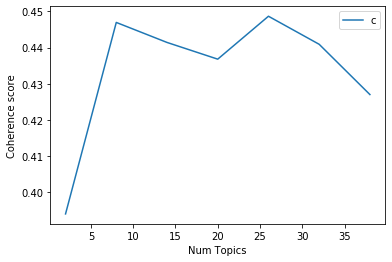

In [78]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [79]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.394
Num Topics = 8  has Coherence Value of 0.4469
Num Topics = 14  has Coherence Value of 0.4414
Num Topics = 20  has Coherence Value of 0.4368
Num Topics = 26  has Coherence Value of 0.4487
Num Topics = 32  has Coherence Value of 0.4409
Num Topics = 38  has Coherence Value of 0.427
